In [2]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import PIL
from scipy.ndimage import gaussian_filter

from pathlib import Path
import sys
sys.path.append(str(Path(__session__).parent.parent))

In [3]:
from utils import *
from detect import *
from scipy.ndimage import distance_transform_edt
from skimage.morphology import medial_axis, skeletonize
import matplotlib.pyplot as plt

LOOKUP_RADIUS_FACTOR = .5
ANGLE_LOOKUP_RANGE = 40
R1_MUL = 1.
A_RANGE_MUL = 1.

In [4]:
db = SalamandraDB(load_images=True)

In [17]:
salamandras = list(db.content.values())
salamandra = salamandras[3]

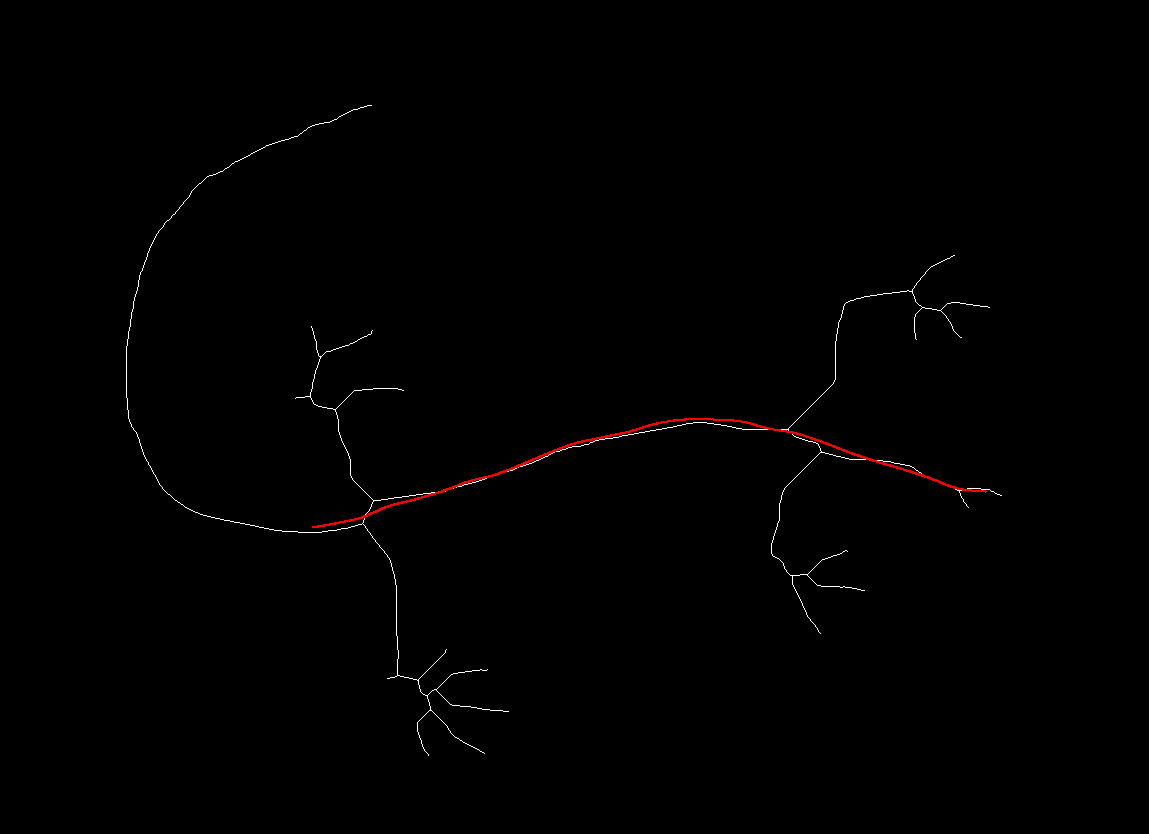

In [18]:
PIL.Image.fromarray(draw_bezier(skeletonize(salamandra.body.detection.mask), salamandra.body.bezier_curve))

In [21]:
r = LOOKUP_RADIUS_FACTOR * scale
a_range = ANGLE_LOOKUP_RANGE
pp = trace_ridges(skel, skel_thin, r, a_range, R1_MUL * 4, A_RANGE_MUL * 2)
b = bezier_from_polyline(pp)

In [150]:
deep = dist * (dist >= scale)
deep_ridge = ridge_from_distance(deep)
r = LOOKUP_RADIUS_FACTOR * scale
a_range = ANGLE_LOOKUP_RANGE
pp = trace_ridges(ridge, deep_ridge, r, a_range, R1_MUL * 4, A_RANGE_MUL * 2)
b = bezier_from_polyline(pp)

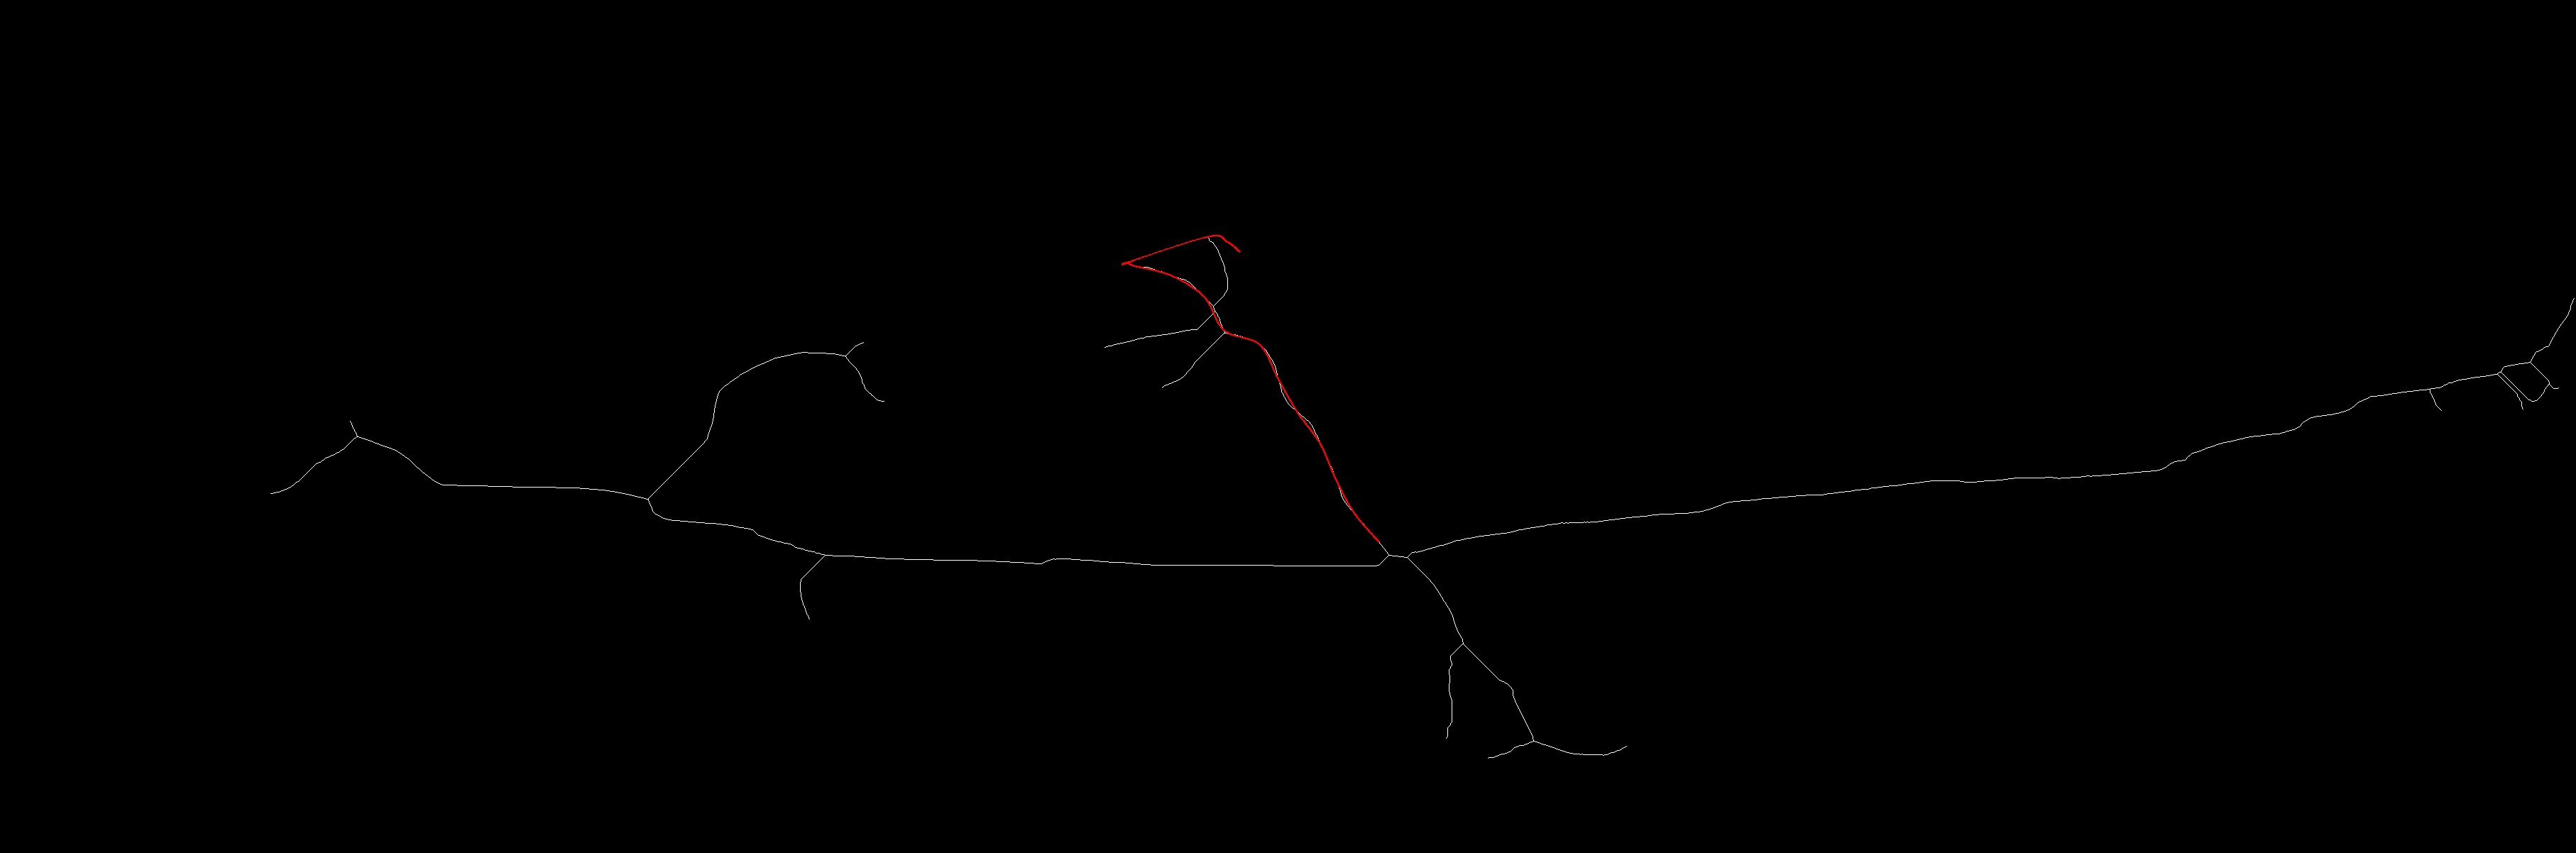

In [23]:
PIL.Image.fromarray(draw_bezier(skel_thin, b))

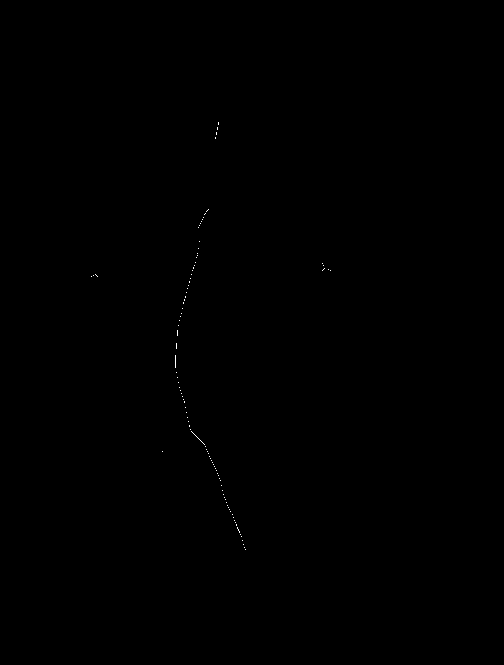

In [152]:
scale1 = np.quantile(dist[dist > 0], .7)
mid = dist * (dist >= scale1)
show_monochrome(ridge_from_distance(mid))